In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


def cv2_show(im):
    cv2.namedWindow('image',cv2.WINDOW_NORMAL)
    cv2.imshow('image',im)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [2]:
def NOISE(IM,mean=0,sigma=1,percent=0.2):
    noisenum=int(IM.shape[0]*percent*IM.shape[1])
    im=IM
    for j in range(noisenum):
        
        randx=np.random.randint(0,im.shape[0]-1)
        randy=np.random.randint(0,im.shape[1]-1)
        im[randx,randy,:]=im[randx,randy,:]+np.random.normal(mean,sigma)
        for i in range(im.shape[2]):
            if im[randx,randy,i]<0:
                im[randx,randy,i]=0
            if im[randx,randy,i]>255:
                im[randx,randy,i]=255
    return im.astype(np.uint8)

In [3]:
im=cv2.imread('../data/video/cat.jpg')
im_noise=NOISE(im,0,20,percent=0.2)  



cv2_show(im_noise)

均值滤波，使用单位卷积核

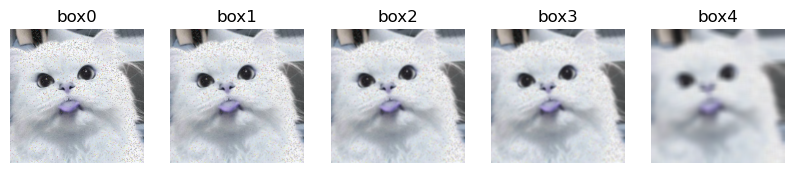

In [4]:
box3=cv2.blur(im_noise,(3,3))
box5=cv2.blur(im_noise,(5,5))
box7=cv2.blur(im_noise,(7,7))
box20=cv2.blur(im_noise,(20,20))
box=[im_noise,box3,box5,box7,box20]
fig,ax=plt.subplots(1,5,figsize=(10,5))
for i in range(5):
    ax[i].imshow(box[i])
    ax[i].axis('off')
    ax[i].set_title('box'+str(i))
    cv2_show(box[i])

方框滤波,约等于均值，用卷积结果直接填充，并没有归一化,越界取255（白色）

In [5]:
boxf=cv2.boxFilter(im_noise,-1,(3,3),normalize=True)#-1默认通道数
cv2_show(boxf)

In [6]:
boxf=cv2.boxFilter(im_noise,-1,(3,3),normalize=False)
cv2_show(boxf)

高斯滤波，卷积核高斯分布

In [7]:
gauss=cv2.GaussianBlur(im_noise,(3,3),1)
cv2_show(gauss)

中值滤波

In [8]:
median=cv2.medianBlur(im_noise,5)
cv2_show(median) 

vs all
np.hstack(vstak)横着拼


In [22]:
vs=np.hstack((box3,gauss,median))
cv2_show(vs)